In [249]:
import pandas as pd
import numpy as np

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [251]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [252]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [253]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


(np.float64(-0.5), np.float64(1250.5), np.float64(715.5), np.float64(-0.5))

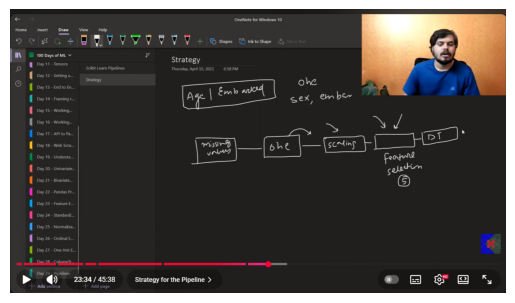

In [254]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("gaurav.png")
plt.imshow(img)
plt.axis("off")

In [255]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=0)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,3,female,NaN,0,2,15.2458,C
439,2,male,31.0,0,0,10.5000,S
817,2,male,31.0,1,1,37.0042,C
378,3,male,20.0,0,0,4.0125,C
491,3,male,21.0,0,0,7.2500,S
...,...,...,...,...,...,...,...
835,1,female,39.0,1,1,83.1583,C
192,3,female,19.0,1,0,7.8542,S
629,3,male,NaN,0,0,7.7333,Q
559,3,female,36.0,1,0,17.4000,S


In [256]:
trf1=ColumnTransformer(transformers=[
    ("Age_impute",SimpleImputer(),[2]),
    ("Embarked_impute",SimpleImputer(strategy="most_frequent"),[6])
],remainder="passthrough")

In [257]:
trf2=ColumnTransformer(transformers=[
    ("sex_embarked_transformed",OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6]),
],remainder="passthrough")

In [258]:
trf3=ColumnTransformer(transformers=[
    ("all_scaled",MinMaxScaler(),slice(0,10))

])

In [259]:
trf4 = SelectKBest(score_func=chi2,k=8)

In [260]:
trf5=DecisionTreeClassifier()

In [261]:
pipe=make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [262]:
#another method

In [263]:
pipe=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",trf4),
    ("trf5",trf5)
])

In [264]:
pipe.fit(x_train,y_train)

,steps,"[('trf1', ...), ('trf2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Age_impute', ...), ('Embarked_impute', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [265]:
y_pred=pipe.predict(x_test)

In [266]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [267]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [268]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6759776536312849

### cross validation using pipeline

In [269]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train,y_train,cv=5,scoring="accuracy").mean()

np.float64(0.6152171771890081)

### grid search using pipeline

In [270]:
params={
    "trf5__max_depth":[1,2,3,4,5,None]
}

In [271]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipe,params,cv=5,scoring="accuracy")

In [272]:
grid.fit(x_train,y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'trf5__max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('Age_impute', ...), ('Embarked_impute', ...)]"


In [273]:
grid.best_score_

np.float64(0.6152171771890081)

In [274]:
grid.best_params_

{'trf5__max_depth': 5}

### exporting the pipeline

In [280]:
import pickle

In [281]:
pickle.dump(pipe,open("models/pipes.pkl","wb"))